In [16]:
import numpy as np
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
from sklearn import neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
df = pd.read_csv("facial-embeddings.csv")
new_df = df[df['name'] != 'Yonathan']
new_df = new_df.drop(columns=['Unnamed: 0'])
new_df.head()

,name,embedding
0,Alvandy,"[-0.08260558545589447, 0.04126936197280884, 0...."
1,Alvandy,"[-0.08091454952955246, 0.06770825386047363, 0...."
2,Alvandy,"[-0.04926420748233795, 0.08213754743337631, 0...."
3,Alvandy,"[-0.07122804969549179, 0.11059367656707764, 0...."
4,Alvandy,"[-0.06552636623382568, 0.07253175973892212, 0...."


In [4]:
new_df['name'] = new_df['name'].replace('Yonathan v2', 'Yonathan')
new_df.tail()

,name,embedding
1171,Yonathan,"[-0.07743033021688461, 0.07706646621227264, 0...."
1172,Yonathan,"[-0.047055888921022415, 0.04320114105939865, 0..."
1173,Yonathan,"[-0.06657466292381287, 0.08987622708082199, 0...."
1174,Yonathan,"[-0.0803665965795517, 0.07627370208501816, 0.1..."
1175,Yonathan,"[-0.06935492157936096, 0.07587584853172302, 0...."


In [9]:
X_train, X_test, y_train, y_test = train_test_split(new_df['embedding'], new_df['name'],
                                                    train_size=0.8, random_state=0)

In [14]:
print(type(X_train[0]))
X_train = [np.fromstring(x[1:], sep=",") for x in X_train]
X_test = [np.fromstring(x[1:], sep=",") for x in X_test]
print(type(X_train[0]))
print(type(X_test[0]))

<class 'str'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2040\1965393634.py:2: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  X_train = [np.fromstring(x[1:], sep=",") for x in X_train]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2040\1965393634.py:3: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  X_test = [np.fromstring(x[1:], sep=",") for x in X_test]


In [20]:
# KNN
knn_clf = neighbors.KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

print(f"Test set predictions: {accuracy_score(y_test, y_pred):.3%}")
# Compute precision and recall on test data
print("🎯Precision, Recall, and F1-Score \n", classification_report(y_test, y_pred, target_names=new_df['name'].unique(), digits=5))

Test set predictions: 95.918%
🎯Precision, Recall, and F1-Score 
               precision    recall  f1-score   support

     Alvandy    1.00000   1.00000   1.00000        30
        Gres    0.97619   0.95349   0.96471        43
       Jacky    1.00000   1.00000   1.00000        34
      Kelvin    0.91304   0.91304   0.91304        46
    Yonathan    0.93182   0.95349   0.94253        43

    accuracy                        0.95918       196
   macro avg    0.96421   0.96400   0.96406       196
weighted avg    0.95941   0.95918   0.95924       196



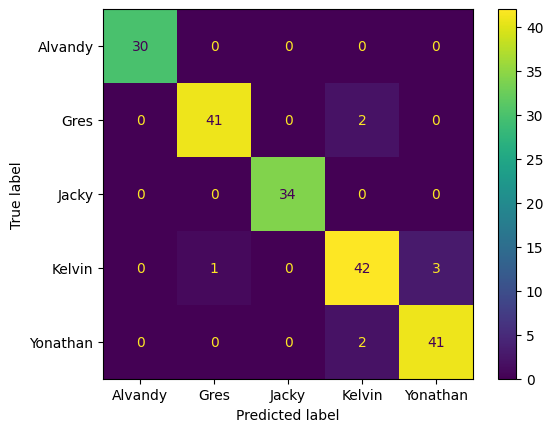

In [21]:
# KNN Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=new_df['name'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=new_df['name'].unique())
disp.plot()
plt.show()

In [22]:
# SVM
svm_clf = svm.SVC(random_state=0)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

print(f"Test set predictions: {accuracy_score(y_test, y_pred):.3%}")
# Compute precision and recall on test data
print("🎯Precision, Recall, and F1-Score \n", classification_report(y_test, y_pred, target_names=new_df['name'].unique(), digits=5))

Test set predictions: 94.898%
🎯Precision, Recall, and F1-Score 
               precision    recall  f1-score   support

     Alvandy    1.00000   1.00000   1.00000        30
        Gres    1.00000   0.93023   0.96386        43
       Jacky    1.00000   1.00000   1.00000        34
      Kelvin    0.86000   0.93478   0.89583        46
    Yonathan    0.92857   0.90698   0.91765        43

    accuracy                        0.94898       196
   macro avg    0.95771   0.95440   0.95547       196
weighted avg    0.95147   0.94898   0.94956       196



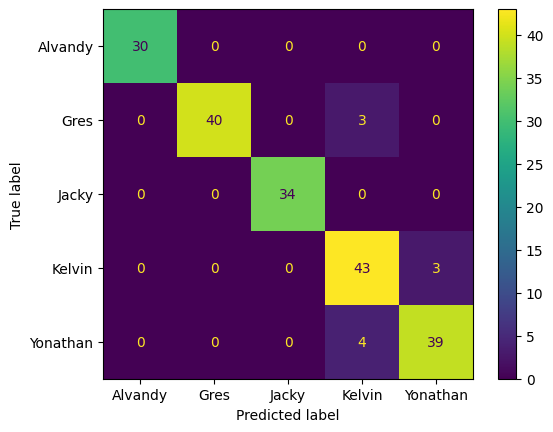

In [23]:
# SVM Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=new_df['name'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=new_df['name'].unique())
disp.plot()
plt.show()

In [24]:
# Saving models
# KNN model
dump(knn_clf, "knn_classifier.joblib")

# SVM model
dump(svm_clf, "svm_classifier.joblib")

['svm_classifier.joblib']